In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
filepath = '/content/gdrive/My Drive/' + 'csv/Spaceship_Titanic/'

Mounted at /content/gdrive


In [ ]:
import pandas as pd
# Read the CSV file into a DataFrame
df_train = pd.read_csv(filepath+'train.csv')
df_test = pd.read_csv(filepath+'test.csv')
# Display the DataFrame
print(df_train.head(3))
print(df_test.head(3))

  PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck             Name  \
0          0.0        0.0           0.0     0.0     0.0  Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0     Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0    Altark Susent   

   Transported  
0        False  
1         True  
2        False  
  PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0013_01      Earth      True  G/3/S  TRAPPIST-1e  27.0  False   
1     0018_01      Earth     False  F/4/S  TRAPPIST-1e  19.0  False   
2     0019_01     Europa      True  C/0/S  55 Cancri e  31.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck  

In [ ]:
len(df_train)

8693

In [ ]:
import numpy as np
def get_data_from_df(df):
  n_feat = 7
  x = np.zeros([len(df), n_feat])

  # 카테고리 Features
  x[:, 0] = df.CryoSleep.fillna(df.CryoSleep.mode()[0])

  # 수치형 Features
  x[:, 1] = df.Age.fillna(df.Age.median())
  x[:, 2] = df.RoomService.fillna(df.RoomService.median())
  x[:, 3] = df.FoodCourt.fillna(df.FoodCourt.median())
  x[:, 4] = df.ShoppingMall.fillna(df.ShoppingMall.median())
  x[:, 5] = df.Spa.fillna(df.Spa.median())
  x[:, 6] = df.VRDeck.fillna(df.VRDeck.median())
  return x


In [ ]:
# train_data['Transported'] = train_data['Transported'].map({True: 1, False: 0})

In [ ]:
x_train = get_data_from_df(df_train)
# y_train = df_train["Transported"].values.reshape(-1, 1)
y_train = df_train["Transported"].map({True: 1, False: 0}).values.reshape(-1, 1)
x_test = get_data_from_df(df_test)

In [ ]:
import torch
from torch.utils.data import TensorDataset, DataLoader
# train_dataset = TitanicDataset(data=x_train, labels=y_train, mode='train')
# test_dataset = TitanicDataset(data=x_test, mode='test')
train_dataset = TensorDataset(torch.tensor(x_train, dtype=torch.float32), \
  torch.tensor(y_train, dtype=torch.long))
test_dataset = TensorDataset(torch.tensor(x_test, dtype=torch.float32))

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [ ]:
import torch.nn as nn

class TitanicNet(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super(TitanicNet, self).__init__()
    self.fc1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.fc2 = nn.Linear(hidden_size, output_size)
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    out = self.fc1(x)
    out = self.relu(out)
    out = self.fc2(out)
    out = self.sigmoid(out)

    return out

In [ ]:
import torch
import torch.optim as optim

input_size = len(x_train[0])
hidden_size = 64
output_size = 1
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

model = TitanicNet(input_size, hidden_size, output_size)
model = model.to(device)

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

cuda


In [ ]:
num_epochs = 300

total_correct, total_samples = 0, 0
losses = []
model.train()
for epoch in range(num_epochs):
  epoch_loss = 0
  for inputs, labels in train_loader:
    inputs = inputs.float().to(device)
    labels = labels.float().to(device)

    outputs = model(inputs)
    loss = criterion(outputs, labels)
    epoch_loss += loss.item()

    predicted = torch.round(outputs)
    total_correct += (predicted == labels).sum().item()
    total_samples += labels.size(0)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  losses.append(epoch_loss)

  accuracy = total_correct / total_samples
  print(f"Epoch : {epoch: 2d}, Accuracy: {accuracy: .6f}")

Epoch :  0, Accuracy:  0.746693
Epoch :  1, Accuracy:  0.756298
Epoch :  2, Accuracy:  0.757123
Epoch :  3, Accuracy:  0.757276
Epoch :  4, Accuracy:  0.757713
Epoch :  5, Accuracy:  0.759097
Epoch :  6, Accuracy:  0.760218
Epoch :  7, Accuracy:  0.759893
Epoch :  8, Accuracy:  0.760062
Epoch :  9, Accuracy:  0.759738
Epoch :  10, Accuracy:  0.760016
Epoch :  11, Accuracy:  0.760056
Epoch :  12, Accuracy:  0.760099
Epoch :  13, Accuracy:  0.760283
Epoch :  14, Accuracy:  0.760505
Epoch :  15, Accuracy:  0.760813
Epoch :  16, Accuracy:  0.760768
Epoch :  17, Accuracy:  0.760708
Epoch :  18, Accuracy:  0.760697
Epoch :  19, Accuracy:  0.760767
Epoch :  20, Accuracy:  0.760924
Epoch :  21, Accuracy:  0.760973
Epoch :  22, Accuracy:  0.761307
Epoch :  23, Accuracy:  0.761489
Epoch :  24, Accuracy:  0.761753
Epoch :  25, Accuracy:  0.762134
Epoch :  26, Accuracy:  0.762252
Epoch :  27, Accuracy:  0.762510
Epoch :  28, Accuracy:  0.762591
Epoch :  29, Accuracy:  0.762775
Epoch :  30, Accurac

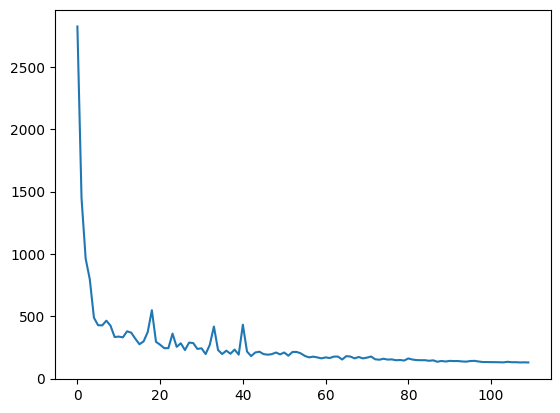

In [ ]:
import matplotlib.pyplot as plt

losses = np.array(losses)

plt.plot(losses)
plt.show()

In [ ]:
total_pred = []

model.eval()
with torch.no_grad():
  for inputs in test_loader:
    # inputs = inputs.float().to(device)
    inputs = inputs[0].to(device)

    outputs = model(inputs)
    predicted = torch.round(outputs)
    total_pred += predicted.int().tolist()

In [ ]:
total_pred

[[1],
 [0],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [0],
 [0],
 [1],
 [1],
 [0],
 [0],
 [0],
 [1],
 [1],
 [0],
 [1],
 [0],
 [1],
 [1],
 [1],
 [0],
 [1],
 [1],
 [1],
 [1],
 [1],
 [0],
 [1],
 [1],
 [0],
 [0],
 [1],
 [1],
 [1],
 [0],
 [1],
 [0],
 [1],
 [1],
 [0],
 [1],
 [0],
 [0],
 [1],
 [0],
 [1],
 [1],
 [0],
 [1],
 [0],
 [1],
 [0],
 [1],
 [1],
 [0],
 [1],
 [1],
 [0],
 [1],
 [1],
 [0],
 [1],
 [0],
 [1],
 [0],
 [0],
 [1],
 [0],
 [0],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [0],
 [0],
 [1],
 [1],
 [1],
 [0],
 [1],
 [1],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [1],
 [0],
 [1],
 [1],
 [1],
 [1],
 [1],
 [0],
 [1],
 [0],
 [1],
 [1],
 [0],
 [1],
 [1],
 [0],
 [1],
 [1],
 [0],
 [1],
 [1],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [1],
 [1],
 [0],
 [0],
 [1],
 [0],
 [1],
 [0],
 [0],
 [1],
 [0],
 [1],
 [0],
 [0],
 [0],
 [0],
 [1],
 [1],
 [1],
 [0],
 [1],
 [0],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [0],
 [0],
 [1],
 [1],
 [1],
 [0],
 [0],
 [0],
 [1],
 [1],
 [1],
 [0],
 [0],
 [1]

In [ ]:
total_pred = np.array(total_pred).flatten()

df_test['Transported'] = total_pred
df_test['Transported'] = df_test['Transported'].map({1: True, 0: False})
df_test[['PassengerId', 'Transported']].to_csv('result.csv', index=False)